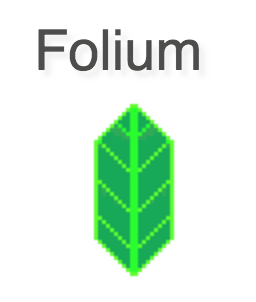

### Python에서 사용 가능한 라이브러리로서 지도를 다루는 대표적인 라이브러리
### leaflet.js 기반으로 지도를 그려주고, 모바일에서도 쓸 수 있을만큼 가볍다.
https://python-visualization.github.io/folium/

In [1]:
import folium  # 오류 발생 ModuleNotFoundError: No module named 'folium'

In [4]:
# 위의 코드셀을 실행시켰을 때 오류가 발생함 folium 을 설치함
!pip install folium

In [6]:
# 서울 지도 그리기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
display(seoul_map)

In [3]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [7]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=12)

display(seoul_map2)
display(seoul_map3)

In [8]:
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']
display(df.head())

,학교명,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


In [9]:
df.shape

(47, 3)

In [10]:
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=11)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도): #for문은 47번 반복됨. 그때마다 튜플로 묶인애를언패킹한다고 함. 
    folium.Marker([lat, lng], popup=name).add_to(seoul_map) #마커객체가 만들어지고 .add_to를 통해 지도위에 올린다. #popup은 마커를 클릭했을때 뜨는 말풍선 내용이다. 학교 내용이 나온다.
display(seoul_map)

In [11]:
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임 변환
df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
df.columns = ['학교명', '위도', '경도']
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 대학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,             # 원의 내부를 색으로 채움
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도    
                        popup=name         #마커를 클릭했을때 나오는 팝업창 내용 설정
    ).add_to(seoul_map)                    #지도에 마커를 추가
    
display(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('output/seoul_colleges.html') #Folium으로 그려지는 지도는 자바스크립트로 그려지는 거라서 html파일로 저장해야 한다.

In [12]:
import pandas as pd
import folium
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                       zoom_start=12)
tooltip = '클릭하셔용!'

folium.Marker([37.55,126.98], popup='<div style="width:100px;color:green;text-align:center">남산</div>', tooltip=tooltip).add_to(seoul_map) #마커 객체를 만들어서 지도에 추가 #text-align:center은 팝업창에서 글씨가 정중앙에 오도록 설정한다.
folium.Marker([37.58,126.975], popup='<div style="width:100px;text-align:center"><b>경복궁</b></div>', tooltip=tooltip).add_to(seoul_map) #tooltip은 마우스가 올라가면 나오는 팝업창
display(seoul_map)

#### Popup 객체 또는 Marker 객체.add_to(맵객체) 와 맵객체.add_child(Popup 객체 또는 Marker 객체) 동일함

In [13]:
import pandas as pd
import folium
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                       zoom_start=12)
tooltip = '클릭하셔용!'

test = folium.Html('<h3>테스트가 잘 되면 좋겠다~~</h3>', script=True)
popup = folium.Popup(test, max_width=300,min_width=300)
icon = folium.map.Icon(color='red', icon='info-sign')#info-sign을 설정해 정보와 관련된 마커객체가 되도록 설정했다. #color로 색상 빨강색으로 지정

folium.Marker([37.55,126.98], popup = popup, icon=icon, tooltip=tooltip).add_to(seoul_map)
#seoul_map.add_child(folium.Marker([37.55,126.98], popup = popup, icon=icon, tooltip=tooltip))

display(seoul_map)

In [14]:
import pandas as pd
import folium
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                       zoom_start=12)
seoul_map.add_child(folium.LatLngPopup()) #LatLngPopup는 지도위에서 특정 위치를 클릭하면 팝업창이 자동으로 뜨는데 위도, 경도가 뜨도록 하는 기능이다.
#folium.LatLngPopup().add_to(seoul_map)
display(seoul_map)

In [ ]:
import pandas as pd
import folium
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                       zoom_start=12)
folium.Marker(
    [37.55,126.98],
    popup='남산'
).add_to(seoul_map)

seoul_map.add_child(folium.ClickForMarker(popup='내가 찍은 마커!!')) #ClickForMarker는 클릭하면 마커가 생성되도록 하는 함수다.

display(seoul_map)

In [ ]:
import folium

m = folium.Map(location=[37.55,126.99], zoom_start=15)

folium.CircleMarker(
  [37.55,126.99],
  radius=100,
  color='#00ff00',
  fill_color='#ff000099',
  popup='여기가 남산이에요'
).add_to(m)

display(m)

#m.save('output/map.html') #지도가 html파일로 저장된다

In [ ]:
import folium

m = folium.Map(location=[37.55,126.99], zoom_start=15)
html_content = folium.Html('<h3>여기가 <span style="color:red">남산</span>이에요~~</h3>', script=True)
popup_content = folium.Popup(html_content, max_width=300,min_width=300)

folium.CircleMarker(
  [37.55,126.99],
  radius=100,
  color='#00ff00',
  fill_color='#ff000099',
  popup=popup_content
).add_to(m)

display(m)

In [ ]:
m.save('output/map.html') #지도가 html파일로 저장된다

---

## <span style='color:red'>단계구분도(Choropleth map)</span>

### 각기 다른 음영이나 색상 또는 값으로 각 지역과 관련된 데이터를 표현한 지도

#### 지도 데이터 파일 (.geojson, .json) - 지역에 대한 경계 정보를 제공
#### 시각화 하고자 하는 데이터 파일 (.csv 등) - 지역별로 표현하고자 하는 데이터를 제공

__Choropleth와 같은 레이어를 만들 때 위의 이 두 데이터를 파라미터로 넘겨줘야 하는데 데이터들은 각자 다른 파일에 있으므로,__
__시각화할 데이터를 지도에 얹으려면 두 파일의 데이터들을 매핑해야 한다.__

#### folium.Choropleth(
####    geo_data = "지도 데이터 파일(.geojson(또는 .json), geopandas.DataFrame)에 대한 딕셔너리 객체"
####    data = "지도위에 시각화 하고자 하는 데이터파일. (pandas.DataFrame)"
####    columns = [지도 데이터와 매핑할 인덱스 또는 열, 시각화 하려는 값을 가진 열](서울의 구의 이름 담고있는 인덱스나 컬럼 명),
####    key_on = "지도 데이터 파일에서 데이터 파일과 매핑할 값 feature.properties.xxx"(geojson문서에서 매핑될 구 이름을 담고있는 key(key:value의 key) 값. xxx부분에다가 key값을 준다. 경기도행정경계.json 같은 경우 features.properties.name),
####    fill_color = "시각화에 쓰일 칼라맵",[fill_opacity=, line_opacity= ,]    
#### ).add_to(m)


In [15]:
#책 166pg
import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')  
df.columns = df.columns.map(str)
display(df.head())

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [16]:
sr = df['2017']
print(sr)

구분
수원시장안구     293828
수원시권선구     365653
수원시팔달구     193311
수원시영통구     349836
성남시수정구     236932
성남시중원구     230366
성남시분당구     500212
의정부시       441584
안양시만안구     254977
안양시동안구     332787
부천시원미구     442898
부천시소사구     222016
부천시오정구     184073
광명시        332790
평택시        481530
동두천시        97071
안산시상록구     370744
안산시단원구     306966
고양시덕양구     448684
고양시일산동구    293673
고양시일산서구    299626
과천시         57527
구리시        200042
남양주시       665321
오산시        213437
시흥시        419664
군포시        281205
의왕시        155767
하남시        232487
용인시처인구     231553
용인시기흥구     419429
용인시수지구     353099
파주시        437848
이천시        213142
안성시        182786
김포시        392092
화성시        691086
광주시        345947
양주시        212146
포천시        152925
여주시        111984
연천군         45431
가평군         62973
양평군        115105
Name: 2017, dtype: int64


In [17]:
print(sr.index)

Index(['수원시장안구', '수원시권선구', '수원시팔달구', '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구',
       '의정부시', '안양시만안구', '안양시동안구', '부천시원미구', '부천시소사구', '부천시오정구', '광명시', '평택시',
       '동두천시', '안산시상록구', '안산시단원구', '고양시덕양구', '고양시일산동구', '고양시일산서구', '과천시',
       '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시처인구', '용인시기흥구',
       '용인시수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시',
       '연천군', '가평군', '양평군'],
      dtype='object', name='구분')


In [18]:
# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'data/경기도행정구역경계.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [32]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계 #geo_data에는 미리 읽어놓은 geojson문서의 딕셔너리 객체
                  data = sr,      # 표시하려는 데이터 #series객체를 지정하고 있다. 2017년도 인구정보.
                  columns = [sr.index, sr],  #[매칭할 데이터(도시 이름), 2017년도 인구정보를 담고있는 Series 객체의 values값만 읽어옴]# 열 지정 #data에 지정된 데이터프레임에서 어떤 컬럼들을 사용하여 단계구분도를 그릴거냐는 정보를 주는데 첫번째는 geojson문서와 매칭할때 사용할 구 이름을 담고있는 컬럼명이나 (행의)인덱스를 준다. #그리고 어떤 컬럼의 값으로 컬러링을 할 것이냐는 것을 2번째 엘리먼트로 준다.
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3, #line_opacity를 지우면 너무 진해짐.
                  threshold_scale=[10000, 100000, 300000, 500000, 700000],  #인구 수에 대한 구간을 줬다. 범례가 이것에 맞춰서 색상이 처리가 된다.            
                  key_on='feature.properties.name', #각각의 구별로 나눠서 경계정보를 geo_data에서 들고올때(경기도행정구역경계.json 문서) 그 수많은 정보중에 name이 key인 value값을 가져와서 매칭한다는 뜻이다. #feature.properties.은 고정이고 name은 경기도행정구역경계.json파일에서 행정구역 이름을 갖고있는 key값이 'name'이었다.
                  highlight=True  #마우스를 올릴때 색상이 진해지게 설정한다.
                 ).add_to(g_map)

display(g_map)
# 지도를 HTML 파일로 저장하기

#year = 2017
#g_map.save('output/gyonggi_population_' + year + '.html')

In [33]:
### 튤팁처리 추가
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# Choropleth 클래스로 단계구분도 표시하기
fmap=folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = sr,      # 표시하려는 데이터
                 columns = [sr.index, sr],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 highlight=True                 
                 ).add_to(g_map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
     folium.features.GeoJsonTooltip(['name'],labels=False)
)

display(g_map)
# 지도를 HTML 파일로 저장하기
year = '2017'
g_map.save('output/gyonggi_population_' + year + '_2.html')

In [23]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# Choropleth 클래스로 단계구분도 표시하기
fmap=folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = sr,      # 표시하려는 데이터
                 columns = [sr.index, sr],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 highlight=True                 
                 ).add_to(g_map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonPopup(['name'],labels=False)
)

display(g_map)
# 지도를 HTML 파일로 저장하기
year = '2017'
g_map.save('output/gyonggi_population_' + year + '_3.html')

In [24]:
folium.Choropleth?

Init signature:
folium.Choropleth(
    geo_data,
    data=None,
    columns=None,
    key_on=None,
    bins=6,
    fill_color=None,
    nan_fill_color='black',
    fill_opacity=0.6,
    nan_fill_opacity=None,
    line_color='black',
    line_weight=1,
    line_opacity=1,
    name=None,
    legend_name='',
    overlay=True,
    control=True,
    show=True,
    topojson=None,
    smooth_factor=None,
    highlight=None,
    **kwargs,
)
Docstring:     
Apply a GeoJSON overlay to the map.

Plot a GeoJSON overlay on the base map. There is no requirement
to bind data (passing just a GeoJSON plots a single-color overlay),
but there is a data binding option to map your columnar data to
different feature objects with a color scale.

If data is passed as a Pandas DataFrame, the "columns" and "key-on"
keywords must be included, the first to indicate which DataFrame
columns to use, the second to indicate the layer in the GeoJSON
on which to key the data. The 'columns' keyword does not need to be
pa

### 위 코드를 실행시켰을때 다음 4가지가 필수적이다.
##### geo_data,
##### data=None,
##### columns=None,
##### key_on=None,

In [25]:
pop = pd.read_csv("./data/cctv_seoul.csv") #이건 관공서에서 제공한건 아니고 이런저런 데이터들을 가져와서 전처리를 끝낸 자료라고 한다. 만들어진지 좀 되어서 최신자료는 아니라고 함.
pop.head()

,구별,CCTV수,인구수,한국인,외국인,고령자
0,강남구,2780,570500.0,565550.0,4950.0,63167.0
1,강동구,773,453233.0,449019.0,4214.0,54622.0
2,강북구,748,330192.0,326686.0,3506.0,54813.0
3,강서구,884,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0


In [26]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   CCTV수   25 non-null     int64  
 2   인구수     25 non-null     float64
 3   한국인     25 non-null     float64
 4   외국인     25 non-null     float64
 5   고령자     25 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ KB


In [27]:
pop.sort_values(by="외국인", ascending=False)

,구별,CCTV수,인구수,한국인,외국인,고령자
19,영등포구,904,402985.0,368072.0,34913.0,52413.0
6,구로구,1561,447874.0,416487.0,31387.0,56833.0
7,금천구,1015,255082.0,236353.0,18729.0,32970.0
4,관악구,1496,525515.0,507203.0,18312.0,68082.0
10,동대문구,1294,369496.0,354079.0,15417.0,54173.0
5,광진구,707,372164.0,357211.0,14953.0,42214.0
20,용산구,1624,244203.0,229456.0,14747.0,36231.0
13,서대문구,962,327163.0,314982.0,12181.0,48161.0
11,동작구,1091,412520.0,400456.0,12064.0,56013.0
16,성북구,1464,461260.0,449773.0,11487.0,64692.0


In [28]:
import json
geo_path = 'data/seoul_geo.json' #GeoJSON 검색. 위치정보를 갖는 점을 기반으로 체계적으로 지형을 표현하기 위해 설계된 개방형 공개 표줕 형식. json객체형식이어야 하고(중괄호로 묶여야 한다는 말) 그 안에는 key:value 또는 name:value 형식으로 값을 지정해야 하는데 이 때는 type, coordinates 등을 목적에 맞게 작성을 하는 거다. coordinates는 경계의 위도와 경도 부분을 나타내는 정보를 담는다. 그리고 
#geo.json은 국토교통부 같은 데서 툴을 가지고 만드는 것 같다고 말함.
#seoul_geo.json는 구까지 있고 hankuk_geo.json은 서울의 동까지 구분한 파일이다. 이런건 일반인이 만들 수 있는 데이터가 아니고 관련 기관에서 제공을 한다. #구글에 "한국 GeoJSON" 검색해서 제일 위에 글 https://neurowhai.tistory.com/350 에서 geojson파일 제공하는 것 같다.
#http://data.nsdi.go.kr/dataset/15145 에서 shp파일 형태로 제공하는데 이걸 json으로 바꾸는 작업이 필요함.

geo_str = json.load(open(geo_path, encoding='utf-8')) #load()로 json파일을 딕셔너리로 읽어들인다.(그나마 비슷하기 때문) 

In [29]:
print(geo_str)

{'type': 'FeatureCollection', 'name': 'seoul', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'name': '종로구', 'base_year': '2018', 'name_eng': 'Jongno-gu', 'code': '11010'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[126.97468086053324, 37.629805433945975], [126.97496550641705, 37.62902584732434], [126.97619200024447, 37.629086831818235], [126.97841861289852, 37.62929009924553], [126.97952791872238, 37.62889299772442], [126.97993254143336, 37.62855138674378], [126.97997245663913, 37.62845560448294], [126.98004544991201, 37.628280435760445], [126.97960294035302, 37.626371002121644], [126.98090237068868, 37.625391798020395], [126.98168803207568, 37.62449661776251], [126.98184774907679, 37.62431463061319], [126.98310978892584, 37.622104640078], [126.98365101056845, 37.62115092912986], [126.98355888565348, 37.620963267437894], [126.98317999257362, 37.62018285183479], [126.9831620682276, 37.619234

In [31]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop,
               columns = ['구별', '인구수'],
               fill_color = 'YlGnBu', line_opacity=0.3,
               key_on='feature.properties.name',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False #이걸 False로 설정 안 하면 클릭을 하면 지도가 확대된다.
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False) #마우스를 올리면 툴팁정보가 뜨게 한다. []안에다가 툴팁으로 내보낼 내용을 담고있는 geojson문서의 key값을 주는 거다. 여기서는 구의 이름이 툴팁으로 뜨게 한다.
)
display(map)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop,
               columns = ['구별', '고령자'],
               fill_color = 'PuOr', line_opacity=0.3,
               key_on='feature.properties.name',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop,
               columns = ['구별', '외국인'],
               fill_color = 'Reds', line_opacity=0.3,
               key_on='feature.properties.name',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop, line_opacity=0.3,
               columns = ['구별', 'CCTV수'],
               fill_color = 'Blues',
               key_on='feature.properties.name',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],labels=False)
)
display(map)

In [ ]:
import json
geo_path = 'data/hankuk_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
#print(geo_str)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop,
               columns = ['구별', '인구수'],
               fill_color = 'YlGnBu', line_opacity=0.3, #YlGnBu는 yellow로 가서 green으로 가고 blue가 된다는 뜻이다.
               key_on='feature.properties.sggnm',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['sggnm'],labels=False)
)
display(map)

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
fmap=folium.Choropleth(geo_data = geo_str,
               data = pop, line_opacity=0.3,
               columns = ['구별', '인구수'],
               fill_color = 'YlGnBu',
               key_on='feature.properties.sggnm',
               highlight=True).add_to(map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False)
)
display(map)